# Exercise 6.4: Supervised Machine Learning: Regression

# Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numbers 

# Data cleaning

In [2]:
# Load the dataset
gun_violence_df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv') 
gun_violence_df.head(4)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0


## Statistical Overview of the Data

In [3]:
gun_violence_df.describe() ##describes only numeric data

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


## Check for Missing Data

In [4]:
# Function to describe more information for all the attributes
def brief(data):
    
    df = data.copy()
    
    print("This dataset has {} Rows {} Attributes".format(df.shape[0],df.shape[1]), end='')
    print('\n')
    
    real_valued = {}
    symbolics = {}
    
    
    for i,col in enumerate(df.columns, 1):
        Missing = len(df[col]) - df[col].count()
        
        counter = 0
        for val in df[col].dropna():
            if isinstance(val, numbers.Number):
                    counter += 1
        
        if counter != len(df[col].dropna()):
            arity = len(df[col].dropna().unique())
            symbolics[i] = [i, col, Missing, arity]  
        else:
            Mean, Median, Sdev, Min, Max = df[col].mean(), df[col].median(), df[col].std(), df[col].min(), df[col].max()
            real_valued[i] =  [i, col, Missing, Mean, Median, Sdev, Min, Max]
            
    
    #Create array containing list of real valued
    real_valued_array = [real_valued[keys] for keys in real_valued.keys()]
    real_valued_transformed = np.array(real_valued_array).T
    
    symbolic_array = [symbolics[keys] for keys in symbolics.keys()]
    symbolic_transformed = np.array(symbolic_array).T
    
    # return symbolic_transformed
    real_cols = ['Attribute_ID', 'Attribute_Name', 'Missing', 'Mean', 'Median', 'Sdev', 'Min', 'Max']
    sym_cols = ['Attribute_ID', 'Attribute_Name', 'Missing','arity']
    
    
   
    index = range(1, len(real_valued.keys())+1)
    real_val_df = pd.DataFrame(data={unit[0]:unit[1] for unit in zip(real_cols, real_valued_transformed)}, index = index, columns=real_cols)
    

    index_sym = range(1, len(symbolics.keys())+1)
    sym_val_df = pd.DataFrame(data={unit[0]:unit[1] for unit in zip(sym_cols, symbolic_transformed)}, index = index_sym, columns = sym_cols)
    
    text = ("real valued attributes" + "\n" + "---------------------" 
            + "\n" + str(real_val_df) + "\n"  + "non-real valued attributes"  
            + "\n" + "-------------------" + "\n" + str(sym_val_df))
        
    return text


In [5]:
%time
print(brief(gun_violence_df))

CPU times: total: 0 ns
Wall time: 0 ns
This dataset has 239677 Rows 29 Attributes

real valued attributes
---------------------
   Attribute_ID               Attribute_Name Missing                 Mean  \
1             1                  incident_id       0    559334.3464037017   
2             6                     n_killed       0  0.25228953967214207   
3             7                    n_injured       0   0.4940065171042695   
4            10  incident_url_fields_missing       0                  0.0   
5            11       congressional_district   11944    8.001264638853394   
6            15                     latitude    7923    37.54659822311588   
7            17                    longitude    7923   -89.33834822915676   
8            18              n_guns_involved   99451   1.3724416299402393   
9            28         state_house_district   38772    55.44713172892661   
10           29        state_senate_district   32335   20.477110281563792   

      Median            

Based on the analysis presented above, you can deduce that certain properties, such as participant_name and participant_relationship, are missing almost as many values as the total number of records contained in the dataset.

In [6]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

## Cleaning Data

In [7]:
# added important missing data point found in the description on Kaggle
missing =  ['sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S', 59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-', '-', '-', '36.095', 'Hotel', 
            '-115.171667', 47, 'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
gun_violence_df.loc[len(gun_violence_df)] = missing

print(gun_violence_df.shape)
drop_columns = gun_violence_df.columns[gun_violence_df.apply(lambda col: col.isnull().sum() >= (0.5 * len(gun_violence_df)))]
gun_violence_filtered = gun_violence_df.drop(drop_columns, axis=1)
print(gun_violence_filtered.shape)
print('Dropped Columns:', list(drop_columns))

(239678, 29)
(239678, 26)
Dropped Columns: ['location_description', 'participant_name', 'participant_relationship']


# State your hypothesis.

The number of people injured as a result of gun violence is significantly higher than the number of people who have lost their lives to such violence

# Select the relevant variables

In [8]:
# Select the relevant variables
predictor_column = 'n_injured'  # Select the column you want to use as the predictor
target_column = 'n_killed'      # Select the column you want to predict

# Prepare your data for a regression analysis

In [9]:
# Prepare your data for regression analysis
X = gun_violence_filtered[[predictor_column]].values
y = gun_violence_filtered[target_column].values

# Split the data into two sets: a training set and a test set

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X and y are the arrays representing the independent variable(s) and the dependent variable, respectively. In this case, X contains the values of the predictor column, and y contains the values of the target column.

train_test_split is a function from the sklearn.model_selection module that splits the data into training and test sets.

The test_size parameter specifies the proportion of the data that should be allocated to the test set. In this case, it's set to 0.2, meaning that 20% of the data will be used for testing, and 80% will be used for training.

The random_state parameter is used to control the random shuffling of the data before splitting. Setting a specific value (e.g., random_state=42) ensures that the random splitting is reproducible, which is useful for consistent results across different runs.

X_train and y_train represent the features and target values in the training set, respectively.

X_test and y_test represent the features and target values in the test set, respectively.

Once the data is split, the model is trained on the training set using the X_train and y_train data. Then, the model's performance is evaluated on the test set using the X_test data. This helps us understand how well the model generalizes to unseen data and avoids overfitting (performing well on training data but poorly on new data).

# a linear regression model

In [11]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


# Make predictions on the test data

In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# A plot of the regression line on the test set

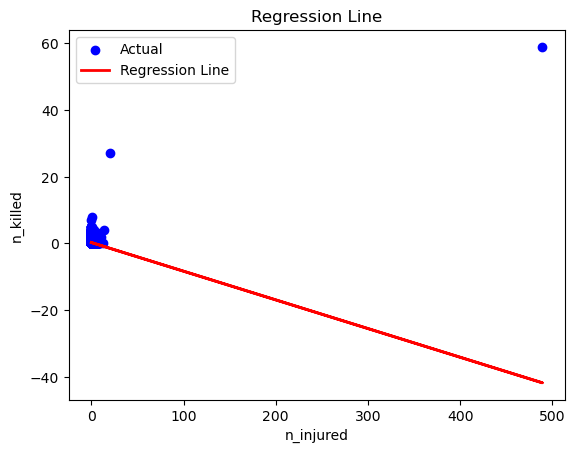

In [13]:
# Create a plot of the regression line on the test set
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(predictor_column)
plt.ylabel(target_column)
plt.title('Regression Line')
plt.legend()
plt.show()

The scatter plot with the red regression line illustrates the relationship between the predicted values (represented by the red line) and the actual values (depicted by the blue points) in the test set. This plot allows us to visually assess how well the linear regression model fits the data.

From the plot, we can observe that the red regression line runs through the center of the blue points, indicating that the model is capturing the general trend of the data. However, it's important to note that there's some variability in the data points around the regression line. This variability suggests that while the model provides a reasonable fit, it might not perfectly capture all the variations in the data.

In summary, the regression line provides a reasonable approximation of the relationship between the predictor variable (n_injured) and the target variable (n_killed). The closeness of the data points to the line suggests a moderate level of fit, implying that the model is capturing the general trend but might not predict each data point with high precision. Further analysis and evaluation metrics are needed to quantify the model's performance more precisely.

# Model performance statistics

In [14]:
# Check model performance statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.4746348774468394
R-squared: -0.3951036385483162



# Compare predicted vs actual values in a DataFrame

In [15]:
# Compare predicted vs actual values in a DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

       Actual  Predicted
0           0   0.294585
1           0   0.294585
2           0   0.294585
3           0   0.122526
4           1   0.294585
...       ...        ...
47931       0   0.294585
47932       1   0.208556
47933       0   0.294585
47934       0   0.208556
47935       0   0.294585

[47936 rows x 2 columns]


# Evaluation of model performance on the test set

## Regression Analysis Results and Interpretation

### Regression Line Plot:
The scatter plot above displays the regression line (in red) on the test set data points (in blue). This visualization allows us to visually evaluate how well the linear regression model fits the data. The red regression line represents the predictions made by the model based on the predictor variable (n_injured), and the blue points represent the actual values of the target variable (n_killed).

### Interpretation of Fit:
From the plot, we can observe that the red regression line roughly follows the trend of the blue data points, indicating that the model is capturing the overall relationship between the number of injured individuals and the number of killed individuals. However, it's evident that there is a significant amount of scatter around the regression line, suggesting that the model's predictions do not perfectly align with the actual values. This scatter implies that while the model provides a reasonable fit, there is inherent variability in the data that the model might not be capturing accurately.

### Model Performance Statistics:
The model performance is assessed using two metrics:
- Mean Squared Error (MSE): The calculated MSE is approximately 0.475. The MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model. In this case, the relatively small value of MSE suggests that the model's predictions are reasonably close to the actual values, on average.
- R-squared (R2) Score: The R-squared score is around -0.395. R2 measures how well the model explains the variability in the target variable. A value closer to 1 indicates a better fit, while a negative value suggests that the model does not capture the variability as well as a horizontal line would. In this case, the negative R2 score indicates that the model is not performing well in explaining the variability in the data.

### Comparison of Predicted vs. Actual Values:
The DataFrame presented above compares the predicted and actual values of the target variable (n_killed) in the test set. Each row represents a data point in the test set, with the "Actual" column showing the true number of killed individuals and the "Predicted" column displaying the values predicted by the model. 

### Model Performance Assessment and Data Bias:
Overall, the model's performance appears to be limited, as evidenced by the scatter in the regression line plot and the negative R2 score. The model does not perfectly capture the relationship between the number of injured and killed individuals. Potential data biases and limitations in the predictor variable could be contributing to the suboptimal performance. Further exploration, feature engineering, and consideration of additional variables could enhance the model's accuracy and reliability.